# Libraries installed

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Libraries used

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from typing import Literal
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import Markdown
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Download and load dataset

The following functions are used to allow users to add their own filepath or URL. Nevertheless, if you don't want to use them, in the next code cell you can find a preloaded file, ready to use.

In [3]:
def download_file(url, filename):
    """
    Download a file from the given URL and save it with the specified filename.

    Parameters:
    - url (str): The URL from which to download the file.
    - filename (str): The name to use when saving the downloaded file.

    Returns:
    None

    Raises:
    - FileNotFoundError: If the file specified by 'filename' is not found after attempting to download.
    - Exception: If an unexpected error occurs during the download process.
    """
    if not(os.path.isfile(filename)):
        print("Downloading file...")

        wget.download(url, filename)
        print(f"Current path: {os.getcwd()}")
        print("Files:")
        print(os.listdir())


def read_file() -> pd.DataFrame:
    """
    Prompt the user for a file path or URL, download the file if it's a URL, and read it into a Pandas DataFrame.

    Returns:
    pd.DataFrame: A DataFrame containing the data from the specified file.

    Raises:
    - pd.errors.ParserError: If there is an issue parsing the file (e.g., incorrect file format).
    - FileNotFoundError: If the specified file is not found.
    - Exception: If an unexpected error occurs during the file reading process.
    """
    while True:
        try:
            file_or_url = input("Enter the file path or URL: ")

            if file_or_url.startswith("http"):
                filename = file_or_url.split("/")[-1] + ".csv"
                download_file(file_or_url, filename)
                return pd.read_csv(filename)

            filename_lowercase = file_or_url.lower()

            if filename_lowercase.endswith('.csv'):
                return pd.read_csv(filename_lowercase)

            if filename_lowercase.endswith(('.xls', '.xlsx')):
                return pd.read_excel(filename_lowercase)

            if filename_lowercase.endswith('.json'):
                return pd.read_json(filename_lowercase)

            print("Unsupported file format. Please provide a CSV, Excel, or JSON file.")

        except pd.errors.ParserError:
            print("Error: Unable to parse the file. Please check the file format.")
        except FileNotFoundError:
            print("Error: File not found. Please enter a valid file path or URL.")
        except Exception as e:
            print(f"An error occurred: {e}")


#df = read_file()
#print(df)


Here is the preloaded file

In [4]:
__DATASET_URL__ = "https://docs.google.com/spreadsheets/d/1lWFIL7h0F7xtmJHNPJX7ttPkO4v9j3xQ2E9Qb1wjek4/export?format=csv&id=1lWFIL7h0F7xtmJHNPJX7ttPkO4v9j3xQ2E9Qb1wjek4&gid=1240299773"

df = pd.read_csv(__DATASET_URL__)

print("\nHead:\n")
print(df.head())


Head:

            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social m

In [5]:
# Show all column names
print("\nColumn names:\n")
print(df.columns)



Column names:

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the pre

In [6]:
df.rename(
    columns={
        'Timestamp': 'timestamp',
        '1. What is your age?': 'age', 
        '2. Gender': 'sex',
        '3. Relationship Status': 'relationship_status', 
        '4. Occupation Status': 'occupation',
        '5. What type of organizations are you affiliated with?': 'affiliated_organization',
        '6. Do you use social media?': 'social_media_user',
        '7. What social media platforms do you commonly use?': 'common_platforms_used',
        '8. What is the average time you spend on social media every day?': 'average_hours_spent_daily',
        '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_use_without_purpose',
        '10. How often do you get distracted by Social media when you are busy doing something?': 'frequency_distracted_by_socials',
        "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
        '12. On a scale of 1 to 5, how easily distracted are you?': 'easily_distracted',
        '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worried_level',
        '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
        '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'frequency_comparing_with_others',
        '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feeling_comparing_with_others',
        '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
        '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
        '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'frequency_fluctuating_interest',
        '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'frequency_sleep_issues',
        }, 
    inplace=True)

df

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,restless_without_social_media,easily_distracted,worried_level,difficulty_concentrating,frequency_comparing_with_others,feeling_comparing_with_others,frequency_seeking_validation,frequency_feeling_depressed,frequency_fluctuating_interest,frequency_sleep_issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [7]:
df.columns

Index(['timestamp', 'age', 'sex', 'relationship_status', 'occupation',
       'affiliated_organization', 'social_media_user', 'common_platforms_used',
       'average_hours_spent_daily', 'frequency_use_without_purpose',
       'frequency_distracted_by_socials', 'restless_without_social_media',
       'easily_distracted', 'worried_level', 'difficulty_concentrating',
       'frequency_comparing_with_others', 'feeling_comparing_with_others',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'frequency_fluctuating_interest', 'frequency_sleep_issues'],
      dtype='object')

# Columns Description
**Complete attribute documentation:**

* **Timestamp**: Date and time of data entry
* **age**: Participant's age
* **sex**: Participant's gender
* **relationship_status**: Current relationship status
* **occupation**: Participant's current occupation status
* **affiliated_organization**: Affiliation with any specific organization
* **social_media_user**: Whether the participant uses social media
* **common_platforms_used**: Social media platforms commonly used
* **average_hours_spent_daily**: Average hours spent on social media daily
* **frequency_use_without_purpose**: How often social media is used without a specific purpose
* **frequency_distracted_by_socials**: Frequency of feeling distracted by social media
* **restless_without_social_media**: Frequency of restlessness when not using social media for a while
* **easily_distracted**: Frequency of being easily distracted
* **worried_level**: How much one is bothered by worries
* **difficulty_concentrating**: Level of difficulty concentrating on tasks
* **frequency_comparing_with_others**: How often the participant compares themselves with successful people on social media
* **feeling_comparing_with_others**: Emotional impact of comparing self with others on social media
* **frequency_seeking_validation**: How often the participant seeks validation on social media
* **frequency_feeling_depressed**: How often the participant feels depressed or down
* **frequency_fluctuating_interest**: How often interests in daily activities fluctuate
* **frequency_sleep_issues**: How often social media usage affects sleep patterns

# Exploring data

In [8]:
print("\nShape:")
print(df.shape)


Shape:
(481, 21)


Check the data types of each column and the number of non-null values

In [9]:
print("\nInfo:\n")
print(df.info())  


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        481 non-null    object 
 1   age                              481 non-null    float64
 2   sex                              481 non-null    object 
 3   relationship_status              481 non-null    object 
 4   occupation                       481 non-null    object 
 5   affiliated_organization          451 non-null    object 
 6   social_media_user                481 non-null    object 
 7   common_platforms_used            481 non-null    object 
 8   average_hours_spent_daily        481 non-null    object 
 9   frequency_use_without_purpose    481 non-null    int64  
 10  frequency_distracted_by_socials  481 non-null    int64  
 11  restless_without_social_media    481 non-null    int64  
 12  easily_distrac

## Standardize Data
Rectify the data type discrepancy in the 'age' column, currently detected as float64 

In [10]:
df['age'] = df['age'].astype(int)

In [11]:
# Code wrote by Hoda

# Convert 'Timestamp' column to pandas datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M:%S')

# Create 'Date' and 'Time' columns
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

# Identify and remove entire duplicate rows
df.drop_duplicates()

# Split the "Social Media" column into a list of social media platforms
df['common_platforms_used'] = df['common_platforms_used'].str.split(', ')

# Create binary columns for each unique social media platform
social_media_columns = df['common_platforms_used'].explode().str.get_dummies().groupby(level=0).max()

# Concatenate the binary columns with the original DataFrame
df = pd.concat([df, social_media_columns], axis=1)

print(df)

              timestamp  age     sex relationship_status          occupation  \
0   2022-04-18 19:18:47   21    Male   In a relationship  University Student   
1   2022-04-18 19:19:28   21  Female              Single  University Student   
2   2022-04-18 19:25:59   21  Female              Single  University Student   
3   2022-04-18 19:29:43   21  Female              Single  University Student   
4   2022-04-18 19:33:31   21  Female              Single  University Student   
..                  ...  ...     ...                 ...                 ...   
476 2022-05-21 23:38:28   24    Male              Single     Salaried Worker   
477 2022-05-22 00:01:05   26  Female             Married     Salaried Worker   
478 2022-05-22 10:29:21   29  Female             Married     Salaried Worker   
479 2022-07-14 19:33:47   21    Male              Single  University Student   
480 2022-11-12 13:16:50   53    Male             Married     Salaried Worker   

    affiliated_organization social_medi

In [12]:
# Conveert 'date' and 'time' columns to pandas datetime format
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

Transforming the "average_hours_spent_daily" column into an ordinal scale, you can use the `map` function in pandas. Here's how you can do it:

The reason for this transformation is to convert the qualitative data in the "average_hours_spent_daily" column into a numerical format that can be used for further analysis.

In [13]:
df['average_hours_spent_daily'].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

In [14]:
ordinal_mapping = {
    'Less than an Hour': 1,
    'Between 1 and 2 hours': 2,
    'Between 2 and 3 hours': 3,
    'Between 3 and 4 hours': 4,
    'Between 4 and 5 hours': 5,
    'More than 5 hours': 6
}

df['average_hours_spent_daily'] = df['average_hours_spent_daily'].map(ordinal_mapping)

Encoding the 'social_media_user' column from a categorical variable into a numerical one

In [15]:
df['social_media_user'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['social_media_user'] = df['social_media_user'].map({'No': 0, 'Yes': 1})

In [17]:
df['sex'].unique()

array(['Male', 'Female', 'Nonbinary ', 'Non-binary', 'NB', 'unsure ',
       'Trans', 'Non binary ', 'There are others???'], dtype=object)

In [18]:
def transform_sex(sex):
    if sex in ['Male', 'Female']:
        return sex
    else:
        return 'Other'

df['sex'] = df['sex'].apply(transform_sex)

df

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,time,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,5,...,19:18:47,1,1,1,0,1,0,0,1,1
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,4,...,19:19:28,1,1,1,0,1,0,0,1,1
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube, Pinterest]",4,3,...,19:25:59,0,1,1,1,0,0,0,0,1
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,1,"[Facebook, Instagram]",6,4,...,19:29:43,0,1,1,0,0,0,0,0,0
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube]",3,3,...,19:33:31,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",1,"[Facebook, Instagram, YouTube]",3,3,...,23:38:28,0,1,1,0,0,0,0,0,1
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",2,2,...,00:01:05,0,1,0,0,0,0,0,0,1
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",3,3,...,10:29:21,0,1,0,0,0,0,0,0,1
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,2,...,19:33:47,1,1,1,1,0,0,0,1,1


In [19]:
ordinal_mapping = {
    'Male': 0,
    'Female': 1,
    'Other': 2
}

df['sex_ordinal'] = df['sex'].map(ordinal_mapping)

df

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube,sex_ordinal
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,5,...,1,1,1,0,1,0,0,1,1,0
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,4,...,1,1,1,0,1,0,0,1,1,1
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube, Pinterest]",4,3,...,0,1,1,1,0,0,0,0,1,1
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,1,"[Facebook, Instagram]",6,4,...,0,1,1,0,0,0,0,0,0,1
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube]",3,3,...,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",1,"[Facebook, Instagram, YouTube]",3,3,...,0,1,1,0,0,0,0,0,1,0
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",2,2,...,0,1,0,0,0,0,0,0,1,1
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",3,3,...,0,1,0,0,0,0,0,0,1,1
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,2,...,1,1,1,1,0,0,0,1,1,0


In [20]:
df['sex_ordinal']

0      0
1      1
2      1
3      1
4      1
      ..
476    0
477    1
478    1
479    0
480    0
Name: sex_ordinal, Length: 481, dtype: int64

## Proportion of missing data
We're interested in the proportion of missing values to assess the overall data quality and make informed decisions regarding data imputation and feature engineering.

In [21]:
df.isnull().sum()

timestamp                           0
age                                 0
sex                                 0
relationship_status                 0
occupation                          0
affiliated_organization            30
social_media_user                   0
common_platforms_used               0
average_hours_spent_daily           0
frequency_use_without_purpose       0
frequency_distracted_by_socials     0
restless_without_social_media       0
easily_distracted                   0
worried_level                       0
difficulty_concentrating            0
frequency_comparing_with_others     0
feeling_comparing_with_others       0
frequency_seeking_validation        0
frequency_feeling_depressed         0
frequency_fluctuating_interest      0
frequency_sleep_issues              0
date                                0
time                                0
Discord                             0
Facebook                            0
Instagram                           0
Pinterest   

In [22]:
prop_miss_values = round(df.isna().mean() * 100, 2)

print("\nProportion of missing values:\n")
print(prop_miss_values)


Proportion of missing values:

timestamp                          0.00
age                                0.00
sex                                0.00
relationship_status                0.00
occupation                         0.00
affiliated_organization            6.24
social_media_user                  0.00
common_platforms_used              0.00
average_hours_spent_daily          0.00
frequency_use_without_purpose      0.00
frequency_distracted_by_socials    0.00
restless_without_social_media      0.00
easily_distracted                  0.00
worried_level                      0.00
difficulty_concentrating           0.00
frequency_comparing_with_others    0.00
feeling_comparing_with_others      0.00
frequency_seeking_validation       0.00
frequency_feeling_depressed        0.00
frequency_fluctuating_interest     0.00
frequency_sleep_issues             0.00
date                               0.00
time                               0.00
Discord                            0.00
Facebook

Drop rows and columns that are entirely NA, if any

In [23]:
df.dropna(how='all')
df.dropna(axis=1, how='all')

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube,sex_ordinal
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,5,...,1,1,1,0,1,0,0,1,1,0
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,4,...,1,1,1,0,1,0,0,1,1,1
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube, Pinterest]",4,3,...,0,1,1,1,0,0,0,0,1,1
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,1,"[Facebook, Instagram]",6,4,...,0,1,1,0,0,0,0,0,0,1
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube]",3,3,...,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",1,"[Facebook, Instagram, YouTube]",3,3,...,0,1,1,0,0,0,0,0,1,0
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",2,2,...,0,1,0,0,0,0,0,0,1,1
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",3,3,...,0,1,0,0,0,0,0,0,1,1
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,2,...,1,1,1,1,0,0,0,1,1,0


### Distribution of null values


In [24]:
retired_students_null_affiliated = df[(df['occupation'].str.contains('Retired|Student', case=False)) 
                          & df['affiliated_organization'].isna()]
print(f"When occupation contains 'retired' or 'student' and affiliated_organization is null: "
    f"{retired_students_null_affiliated.shape[0]}/{df['affiliated_organization'].isna().sum()}")

retired_students_notnull_affiliated = df[df['occupation'].str.contains('Retired|Student', case=False) 
                             & df['affiliated_organization'].notna()]
print(f"When occupation contains 'retired' or 'student' and affiliated_organization is not null: "
    f"{retired_students_notnull_affiliated.shape[0]}")


When occupation contains 'retired' or 'student' and affiliated_organization is null: 22/30
When occupation contains 'retired' or 'student' and affiliated_organization is not null: 327


In [25]:
data = {
    'Occupation': ['Retired/Student', 'Retired/Student'],
    'Affiliated Organization': ['Null', 'Not Null'],
    'Count': [retired_students_null_affiliated.shape[0], retired_students_notnull_affiliated.shape[0]]
}

df_info = pd.DataFrame(data)
df_info


,Occupation,Affiliated Organization,Count
0,Retired/Student,Null,22
1,Retired/Student,Not Null,327


In [26]:
df.loc[(df['occupation'] == 'University Student') 
       & df['affiliated_organization'].isna(), 'affiliated_organization'] = 'University'

df.loc[(df['occupation'] == 'School Student') 
       & df['affiliated_organization'].isna(), 'affiliated_organization'] = 'School'

df.loc[(df['occupation'] == 'Salaried Worker') 
       & df['affiliated_organization'].isna(), 'affiliated_organization'] = 'Private'

df.isnull().sum()

timestamp                          0
age                                0
sex                                0
relationship_status                0
occupation                         0
affiliated_organization            5
social_media_user                  0
common_platforms_used              0
average_hours_spent_daily          0
frequency_use_without_purpose      0
frequency_distracted_by_socials    0
restless_without_social_media      0
easily_distracted                  0
worried_level                      0
difficulty_concentrating           0
frequency_comparing_with_others    0
feeling_comparing_with_others      0
frequency_seeking_validation       0
frequency_feeling_depressed        0
frequency_fluctuating_interest     0
frequency_sleep_issues             0
date                               0
time                               0
Discord                            0
Facebook                           0
Instagram                          0
Pinterest                          0
R

In [27]:
null_affiliated = df[df['affiliated_organization'].isna()]

null_affiliated

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube,sex_ordinal
42,2022-04-18 21:48:07,56,Female,Married,Retired,NaN,1,[YouTube],2,1,...,0,0,0,0,0,0,0,0,1,1
74,2022-04-19 01:16:34,23,Female,Single,Retired,NaN,1,"[Facebook, YouTube, Discord, Reddit]",5,4,...,1,1,0,0,1,0,0,0,1,1
162,2022-04-20 02:07:23,48,Female,Married,Retired,NaN,1,"[Facebook, Instagram, YouTube, Pinterest, TikTok]",6,4,...,0,1,1,1,0,0,1,0,1,1
428,2022-05-12 23:13:03,30,Female,Married,Retired,NaN,1,"[Facebook, Instagram, YouTube]",4,1,...,0,1,1,0,0,0,0,0,1,1
453,2022-05-13 19:48:20,60,Male,Single,Retired,NaN,1,"[Facebook, YouTube]",3,1,...,0,1,0,0,0,0,0,0,1,0


In [28]:
unique_occupations = df['occupation'].unique()
unique_affiliated_organizations = df['affiliated_organization'].unique()

print("Unique Occupations:")
print(unique_occupations)

print("\nUnique Affiliated Organizations:")
print(unique_affiliated_organizations)


Unique Occupations:
['University Student' 'School Student' 'Salaried Worker' 'Retired']

Unique Affiliated Organizations:
['University' 'Private' 'School' 'School, University' 'Company'
 'School, Private' 'University, Company' nan 'Goverment'
 'Company, Private' 'University, Goverment, Private'
 'University, Company, Private' 'University, Private' 'University, N/A'
 'School, University, Private' 'University, Goverment'
 'University, Company, Goverment' 'School, Company' 'School, N/A']


In [29]:
# Split the affiliated_organization column by comma and create binary columns
affiliated_organization_dummies = df['affiliated_organization'].str.get_dummies(', ')

# Select only the columns for the specified categories
categories = ['University', 'Private', 'School', 'Company', 'Goverment']
affiliated_organization_dummies = affiliated_organization_dummies[categories]

# Concatenate the original DataFrame with the new binary columns
df = pd.concat([df, affiliated_organization_dummies], axis=1)

df

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,Snapchat,TikTok,Twitter,YouTube,sex_ordinal,University,Private,School,Company,Goverment
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,5,...,0,0,1,1,0,1,0,0,0,0
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,4,...,0,0,1,1,1,1,0,0,0,0
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube, Pinterest]",4,3,...,0,0,0,1,1,1,0,0,0,0
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,1,"[Facebook, Instagram]",6,4,...,0,0,0,0,1,1,0,0,0,0
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube]",3,3,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",1,"[Facebook, Instagram, YouTube]",3,3,...,0,0,0,1,0,1,1,0,0,0
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",2,2,...,0,0,0,1,1,1,0,0,0,0
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",3,3,...,0,0,0,1,1,1,0,0,0,0
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,2,...,0,0,1,1,0,1,0,0,0,0


In [30]:
df.describe()

,timestamp,age,social_media_user,average_hours_spent_daily,frequency_use_without_purpose,frequency_distracted_by_socials,restless_without_social_media,easily_distracted,worried_level,difficulty_concentrating,...,Snapchat,TikTok,Twitter,YouTube,sex_ordinal,University,Private,School,Company,Goverment
count,481,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,2022-05-01 19:27:09.952182784,26.135135,0.993763,3.908524,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,...,0.376299,0.195426,0.272349,0.856549,0.575884,0.646570,0.212058,0.139293,0.133056,0.020790
min,2022-04-18 19:18:47,13.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-04-19 21:12:27,21.000000,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-04-26 23:32:48,22.000000,1.000000,4.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-05-12 00:16:23,26.000000,1.000000,5.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2022-11-12 13:16:50,91.000000,1.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,9.915079,0.078810,1.590319,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,...,0.484961,0.396941,0.445632,0.350897,0.523371,0.478533,0.409191,0.346613,0.339989,0.142829


## Checking for outliers

In [31]:
numerical_columns = list(df.loc[:,['age', 
                                   'average_hours_spent_daily',
                                   'social_media_user',
                                   'restless_without_social_media', 
                                   'difficulty_concentrating', 
                                   'feeling_comparing_with_others',
                                   'frequency_use_without_purpose', 
                                   'frequency_distracted_by_socials', 
                                   'easily_distracted', 
                                   'worried_level', 
                                   'frequency_comparing_with_others', 
                                   'frequency_seeking_validation', 
                                   'frequency_feeling_depressed', 
                                   'frequency_fluctuating_interest', 
                                   'frequency_sleep_issues', 
                                   'University', 
                                   'Private', 
                                   'School', 
                                   'Company', 
                                   'Goverment']])

categorical_columns = list(df.loc[:,['timestamp', 
                                     'sex', 
                                     'relationship_status', 
                                     'occupation', 
                                     'affiliated_organization', 
                                     'common_platforms_used']])

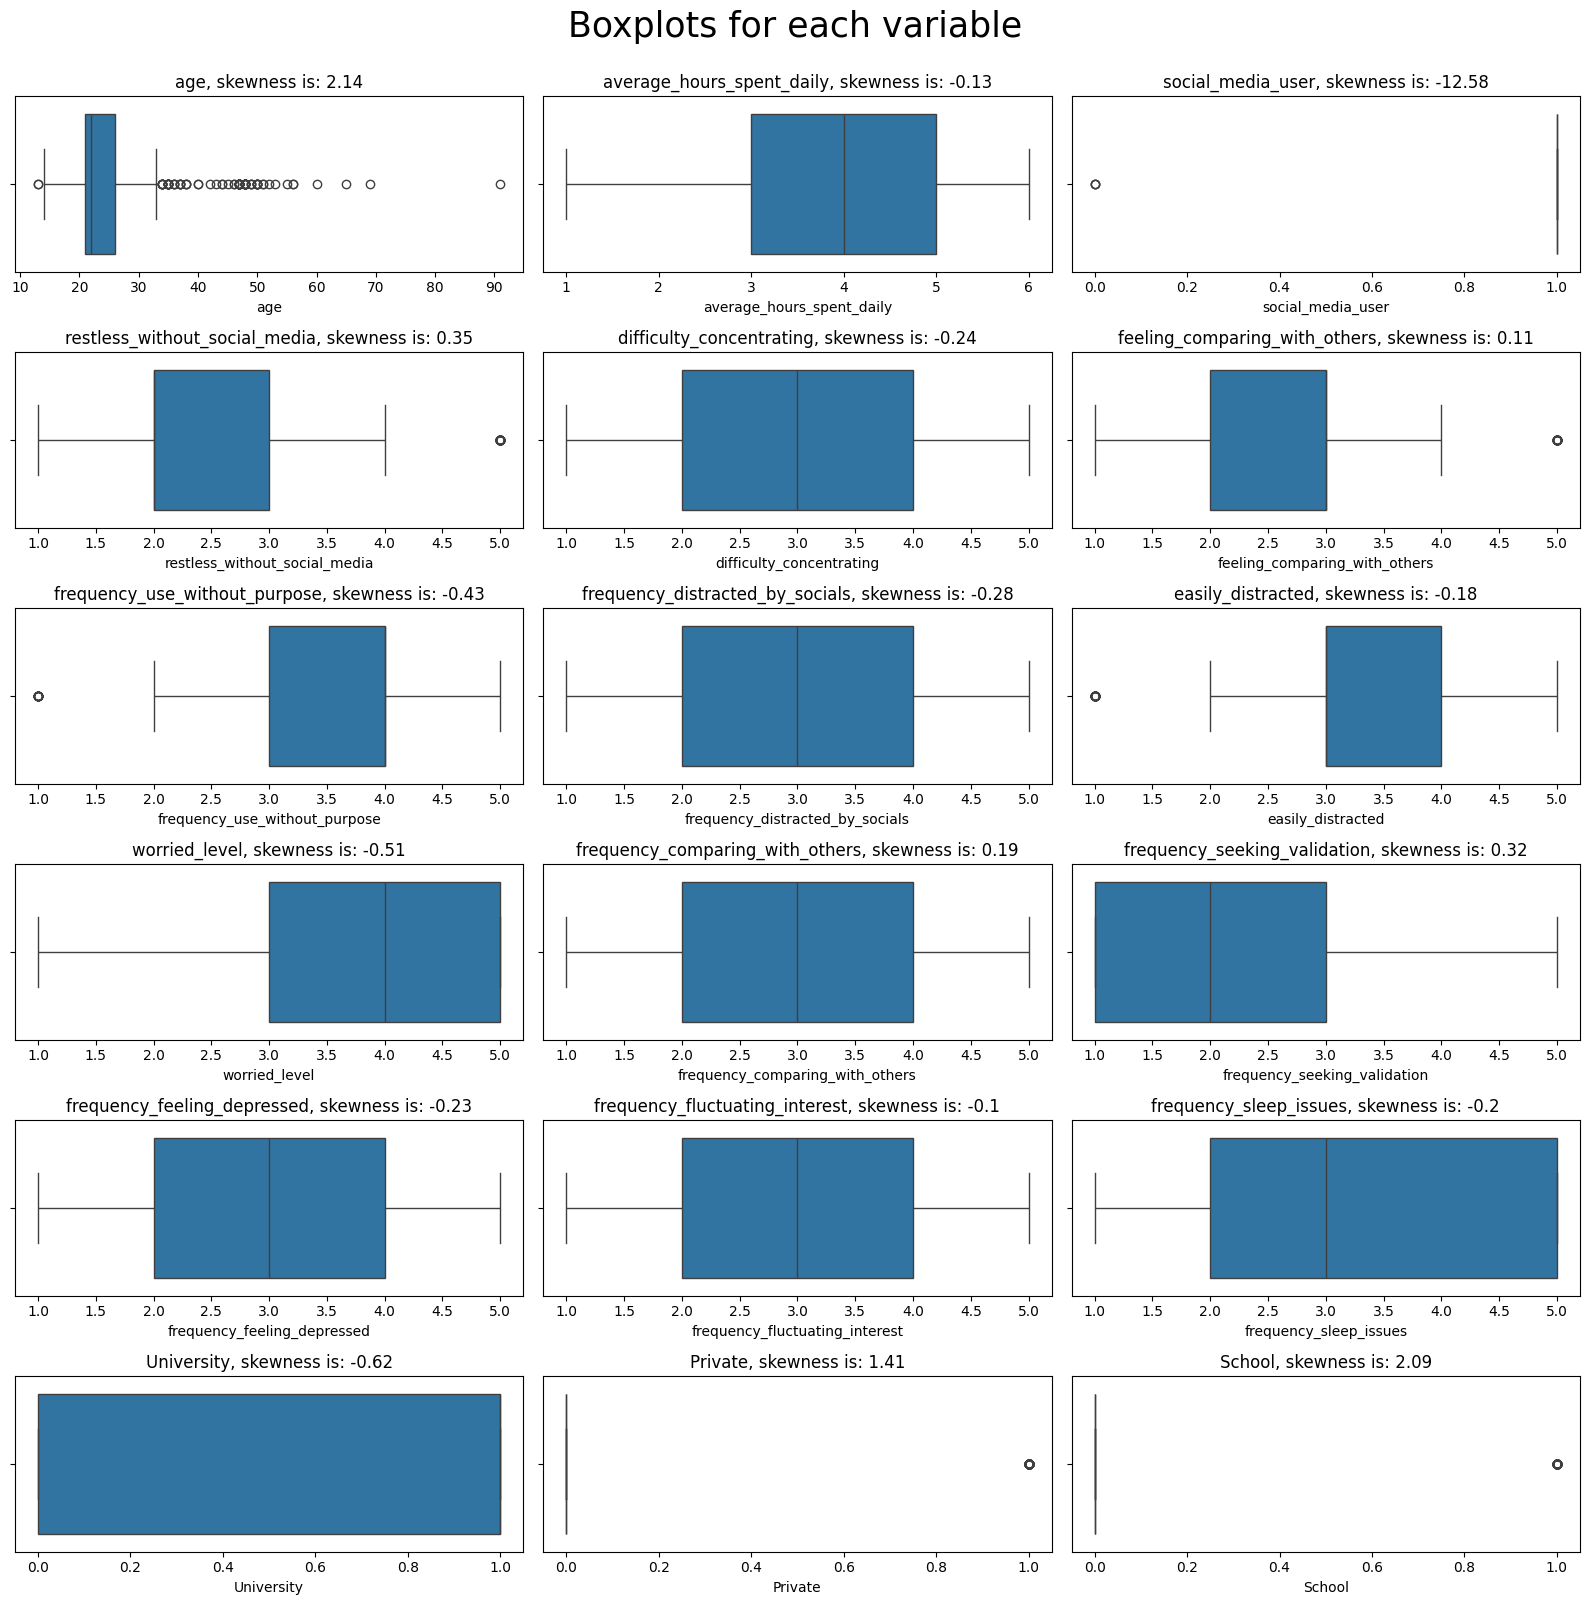

In [32]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,16))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i < len(axs):
            sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
            axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis=0, skipna=True), 2)))
        else:
            break

    plt.subplots_adjust(top=0.9, hspace=0.9)

boxplots_custom(dataset=df, columns_list=numerical_columns, rows=6, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()


**age**:
The skewness of 2.14 for the 'age' variable indicates a positive skew or right skew in the data. This means that there are a number of individuals who are older than the average age and those are significantly different from the rest of the group. This indicates that the age distribution is not normal.

<Axes: >

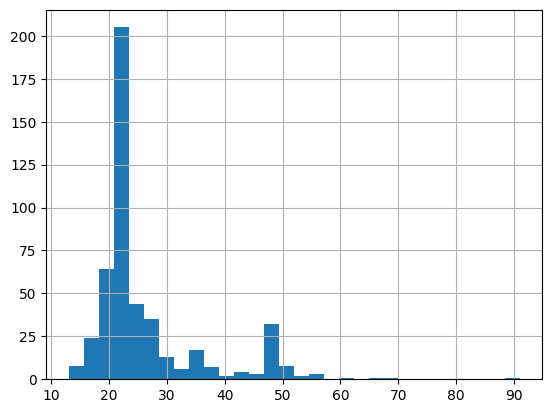

In [33]:
# Age distribution
df['age'].hist(bins=30)

In [34]:
bins = [0, 30, 40, np.inf]
labels = ['young', 'adult', 'older_adult']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,TikTok,Twitter,YouTube,sex_ordinal,University,Private,School,Company,Goverment,age_group
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,5,...,0,1,1,0,1,0,0,0,0,young
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,4,...,0,1,1,1,1,0,0,0,0,young
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube, Pinterest]",4,3,...,0,0,1,1,1,0,0,0,0,young
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,1,"[Facebook, Instagram]",6,4,...,0,0,0,1,1,0,0,0,0,young
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube]",3,3,...,0,0,1,1,1,0,0,0,0,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",1,"[Facebook, Instagram, YouTube]",3,3,...,0,0,1,0,1,1,0,0,0,young
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",2,2,...,0,0,1,1,1,0,0,0,0,young
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",3,3,...,0,0,1,1,1,0,0,0,0,young
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,2,...,0,1,1,0,1,0,0,0,0,young


In [35]:
ordinal_mapping = {
    'young': 1,
    'adult': 2,
    'older_adult': 3
}

df['age_group_ordinal'] = df['age_group'].map(ordinal_mapping)

df

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,Twitter,YouTube,sex_ordinal,University,Private,School,Company,Goverment,age_group,age_group_ordinal
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,5,...,1,1,0,1,0,0,0,0,young,1
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,4,...,1,1,1,1,0,0,0,0,young,1
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube, Pinterest]",4,3,...,0,1,1,1,0,0,0,0,young,1
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,1,"[Facebook, Instagram]",6,4,...,0,0,1,1,0,0,0,0,young,1
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube]",3,3,...,0,1,1,1,0,0,0,0,young,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",1,"[Facebook, Instagram, YouTube]",3,3,...,0,1,0,1,1,0,0,0,young,1
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",2,2,...,0,1,1,1,0,0,0,0,young,1
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",3,3,...,0,1,1,1,0,0,0,0,young,1
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,2,...,1,1,0,1,0,0,0,0,young,1


In [36]:
df['age_group_ordinal'] = df['age_group_ordinal'].astype(int)

# Scalar Adjustment

Addressing a discrepancy in the scoring system for 'feeling_comparing_with_others' column, where higher scores typically indicate poorer mental well-being; this requires adjusting the scale to align with the overall scoring pattern in the research.

In [37]:
max_score = df['feeling_comparing_with_others'].max()
df['feeling_comparing_with_others'] = max_score + 1 - df['feeling_comparing_with_others']

df['feeling_comparing_with_others']

0      3
1      5
2      3
3      5
4      3
      ..
476    4
477    4
478    3
479    3
480    3
Name: feeling_comparing_with_others, Length: 481, dtype: int64

## Aggregation of Likert Scale Data for Overall Orientation

Aggregate Likert scale responses related to the same broad concept by either summing or averaging the assigned numerical codes. This process aims to provide a concise and meaningful indication of each respondent's overall positive or negative orientation toward the specific object of inquiry, considering multiple items that collectively contribute to a comprehensive perspective.

In [38]:
df['adhd'] = df[['frequency_use_without_purpose', 
                 'frequency_distracted_by_socials', 
                 'easily_distracted', 
                 'difficulty_concentrating']].mean(axis=1)

df['anxiety'] = df[['restless_without_social_media', 
                    'worried_level']].mean(axis=1)

df['self_esteem_issues'] = df[['frequency_comparing_with_others', 
                               'feeling_comparing_with_others', 
                               'frequency_seeking_validation']].mean(axis=1)

df['depression'] = df[['frequency_feeling_depressed', 
                       'frequency_fluctuating_interest', 
                       'frequency_sleep_issues']].mean(axis=1)

df

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,Private,School,Company,Goverment,age_group,age_group_ordinal,adhd,anxiety,self_esteem_issues,depression
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,5,...,0,0,0,0,young,1,4.50,2.0,2.333333,4.666667
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",6,4,...,0,0,0,0,young,1,3.75,3.5,3.666667,4.666667
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube, Pinterest]",4,3,...,0,0,0,0,young,1,2.75,3.0,2.333333,3.666667
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,1,"[Facebook, Instagram]",6,4,...,0,0,0,0,young,1,3.00,3.0,4.000000,3.000000
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,1,"[Facebook, Instagram, YouTube]",3,3,...,0,0,0,0,young,1,4.25,4.5,3.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",1,"[Facebook, Instagram, YouTube]",3,3,...,1,0,0,0,young,1,3.75,3.0,4.000000,3.666667
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",2,2,...,0,0,0,0,young,1,2.50,3.0,4.000000,3.000000
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,1,"[Facebook, YouTube]",3,3,...,0,0,0,0,young,1,3.00,3.0,3.333333,2.000000
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,1,"[Facebook, Twitter, Instagram, YouTube, Discor...",3,2,...,0,0,0,0,young,1,2.50,2.5,3.000000,4.333333


In [39]:
df.columns = df.columns.str.lower()

In [40]:
df.columns

Index(['timestamp', 'age', 'sex', 'relationship_status', 'occupation',
       'affiliated_organization', 'social_media_user', 'common_platforms_used',
       'average_hours_spent_daily', 'frequency_use_without_purpose',
       'frequency_distracted_by_socials', 'restless_without_social_media',
       'easily_distracted', 'worried_level', 'difficulty_concentrating',
       'frequency_comparing_with_others', 'feeling_comparing_with_others',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'frequency_fluctuating_interest', 'frequency_sleep_issues', 'date',
       'time', 'discord', 'facebook', 'instagram', 'pinterest', 'reddit',
       'snapchat', 'tiktok', 'twitter', 'youtube', 'sex_ordinal', 'university',
       'private', 'school', 'company', 'goverment', 'age_group',
       'age_group_ordinal', 'adhd', 'anxiety', 'self_esteem_issues',
       'depression'],
      dtype='object')

In [41]:
df['total_average_score'] = df[['adhd', 'anxiety', 'self_esteem_issues', 'depression']].mean(axis=1)

df['total_average_score']

0      3.375000
1      3.895833
2      2.937500
3      3.250000
4      3.687500
         ...   
476    3.604167
477    3.125000
478    2.833333
479    3.083333
480    2.062500
Name: total_average_score, Length: 481, dtype: float64

In [42]:
df.columns

Index(['timestamp', 'age', 'sex', 'relationship_status', 'occupation',
       'affiliated_organization', 'social_media_user', 'common_platforms_used',
       'average_hours_spent_daily', 'frequency_use_without_purpose',
       'frequency_distracted_by_socials', 'restless_without_social_media',
       'easily_distracted', 'worried_level', 'difficulty_concentrating',
       'frequency_comparing_with_others', 'feeling_comparing_with_others',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'frequency_fluctuating_interest', 'frequency_sleep_issues', 'date',
       'time', 'discord', 'facebook', 'instagram', 'pinterest', 'reddit',
       'snapchat', 'tiktok', 'twitter', 'youtube', 'sex_ordinal', 'university',
       'private', 'school', 'company', 'goverment', 'age_group',
       'age_group_ordinal', 'adhd', 'anxiety', 'self_esteem_issues',
       'depression', 'total_average_score'],
      dtype='object')

In [43]:
def map_score(score):
  if score < 3.50:
    return "0"
  elif score >= 3.50:
    return "1"

df['has_issues']= df['total_average_score'].apply(lambda score: map_score(score))
df['has_issues'] = df['has_issues'].astype('int64')

print(df['has_issues'])
df['has_issues'].info()

0      0
1      1
2      0
3      0
4      1
      ..
476    1
477    0
478    0
479    0
480    0
Name: has_issues, Length: 481, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 481 entries, 0 to 480
Series name: has_issues
Non-Null Count  Dtype
--------------  -----
481 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


# Analysis

## Correlation

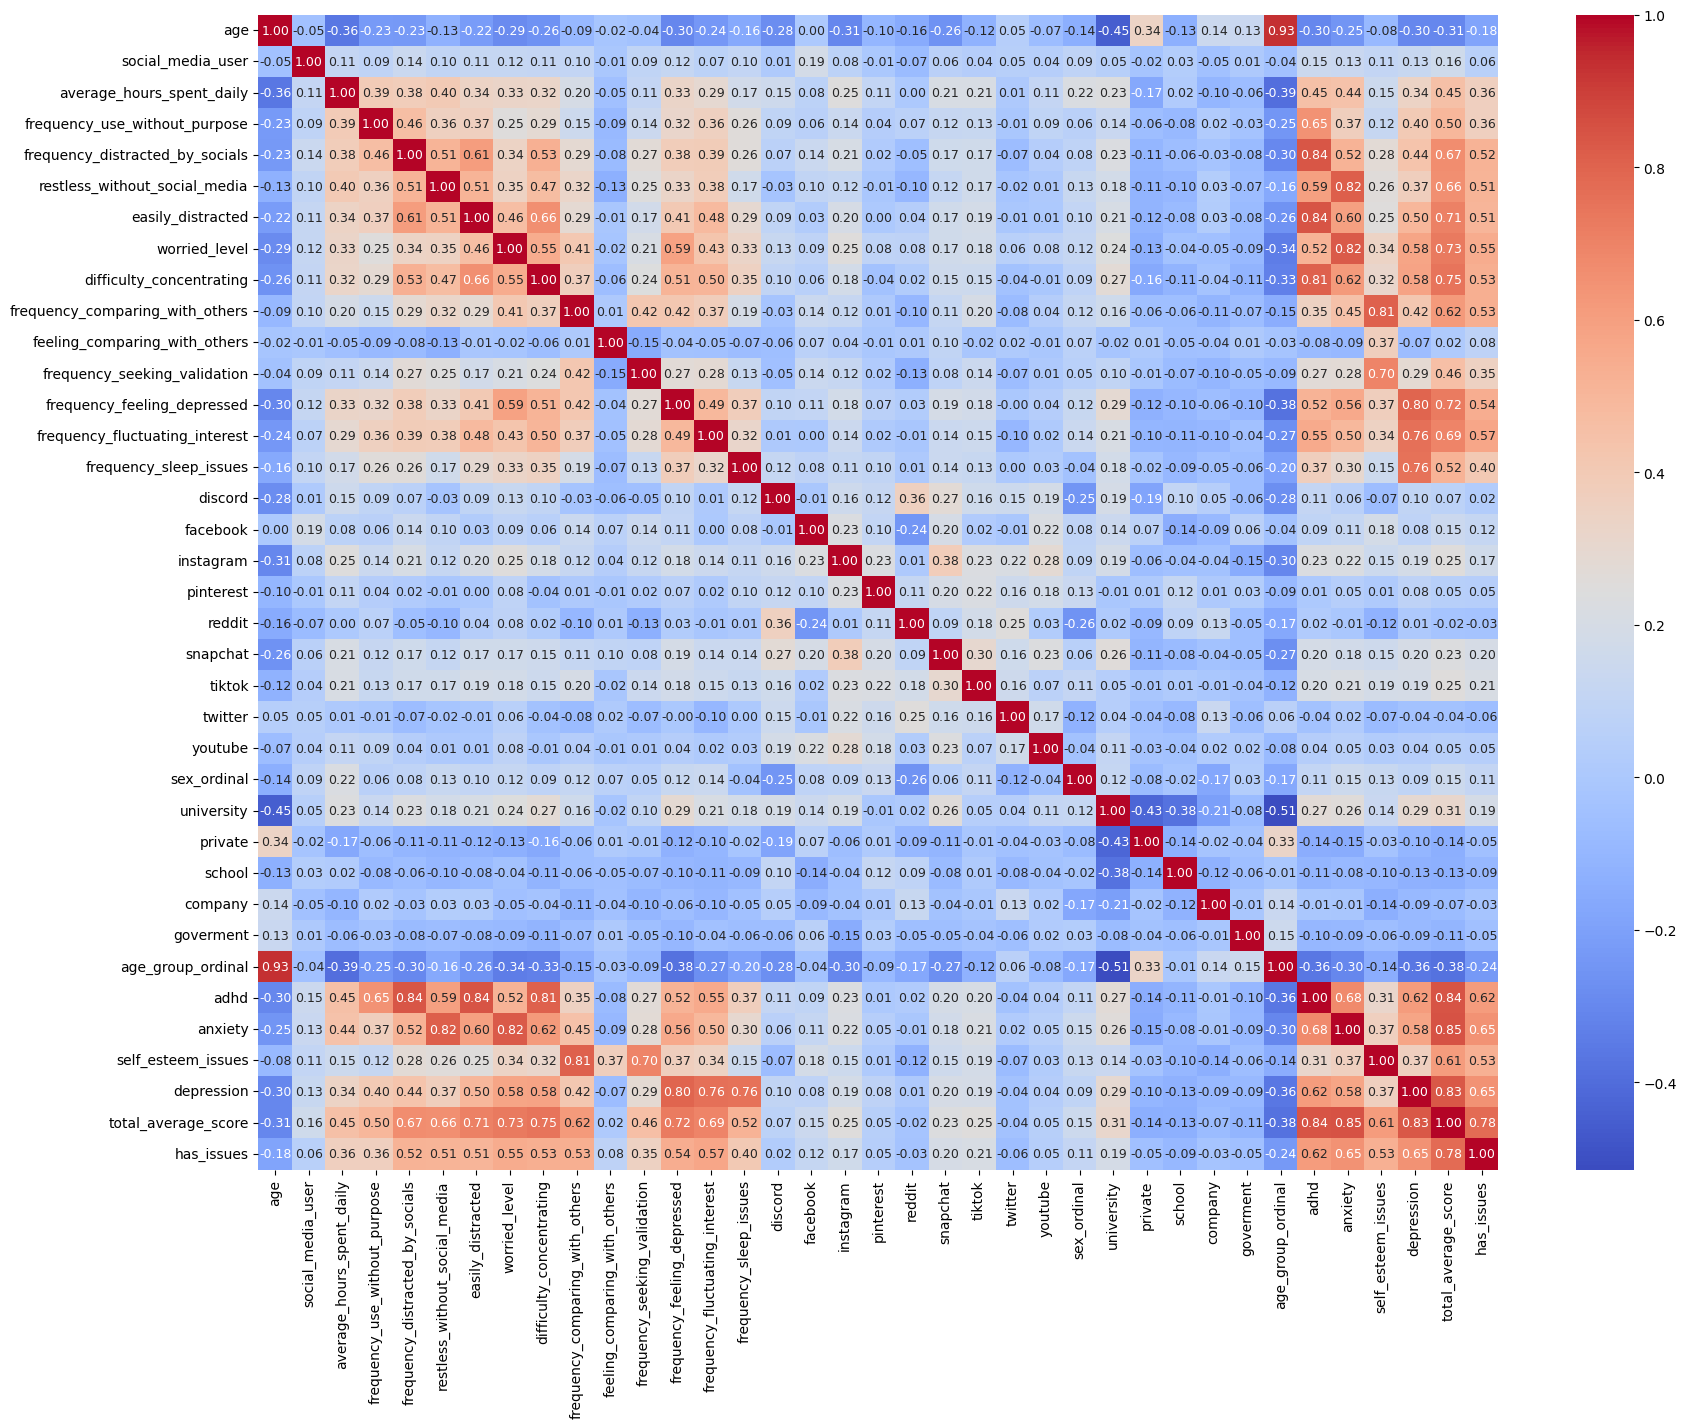

In [44]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size':9})
plt.show()

### Filtering Out Statistically Insignificant Correlations

This helps to focus on the variables that have a significant correlation with each other. C

By removing all values that don't have a statistical significance (in this case, values between -0.2 and 0.2), we are filtering out the variables that have a weak correlation with each other. This makes it easier to identify the variables that have a stronger correlation, it also helps to simplify the correlation matrix and make it easier to interpret.

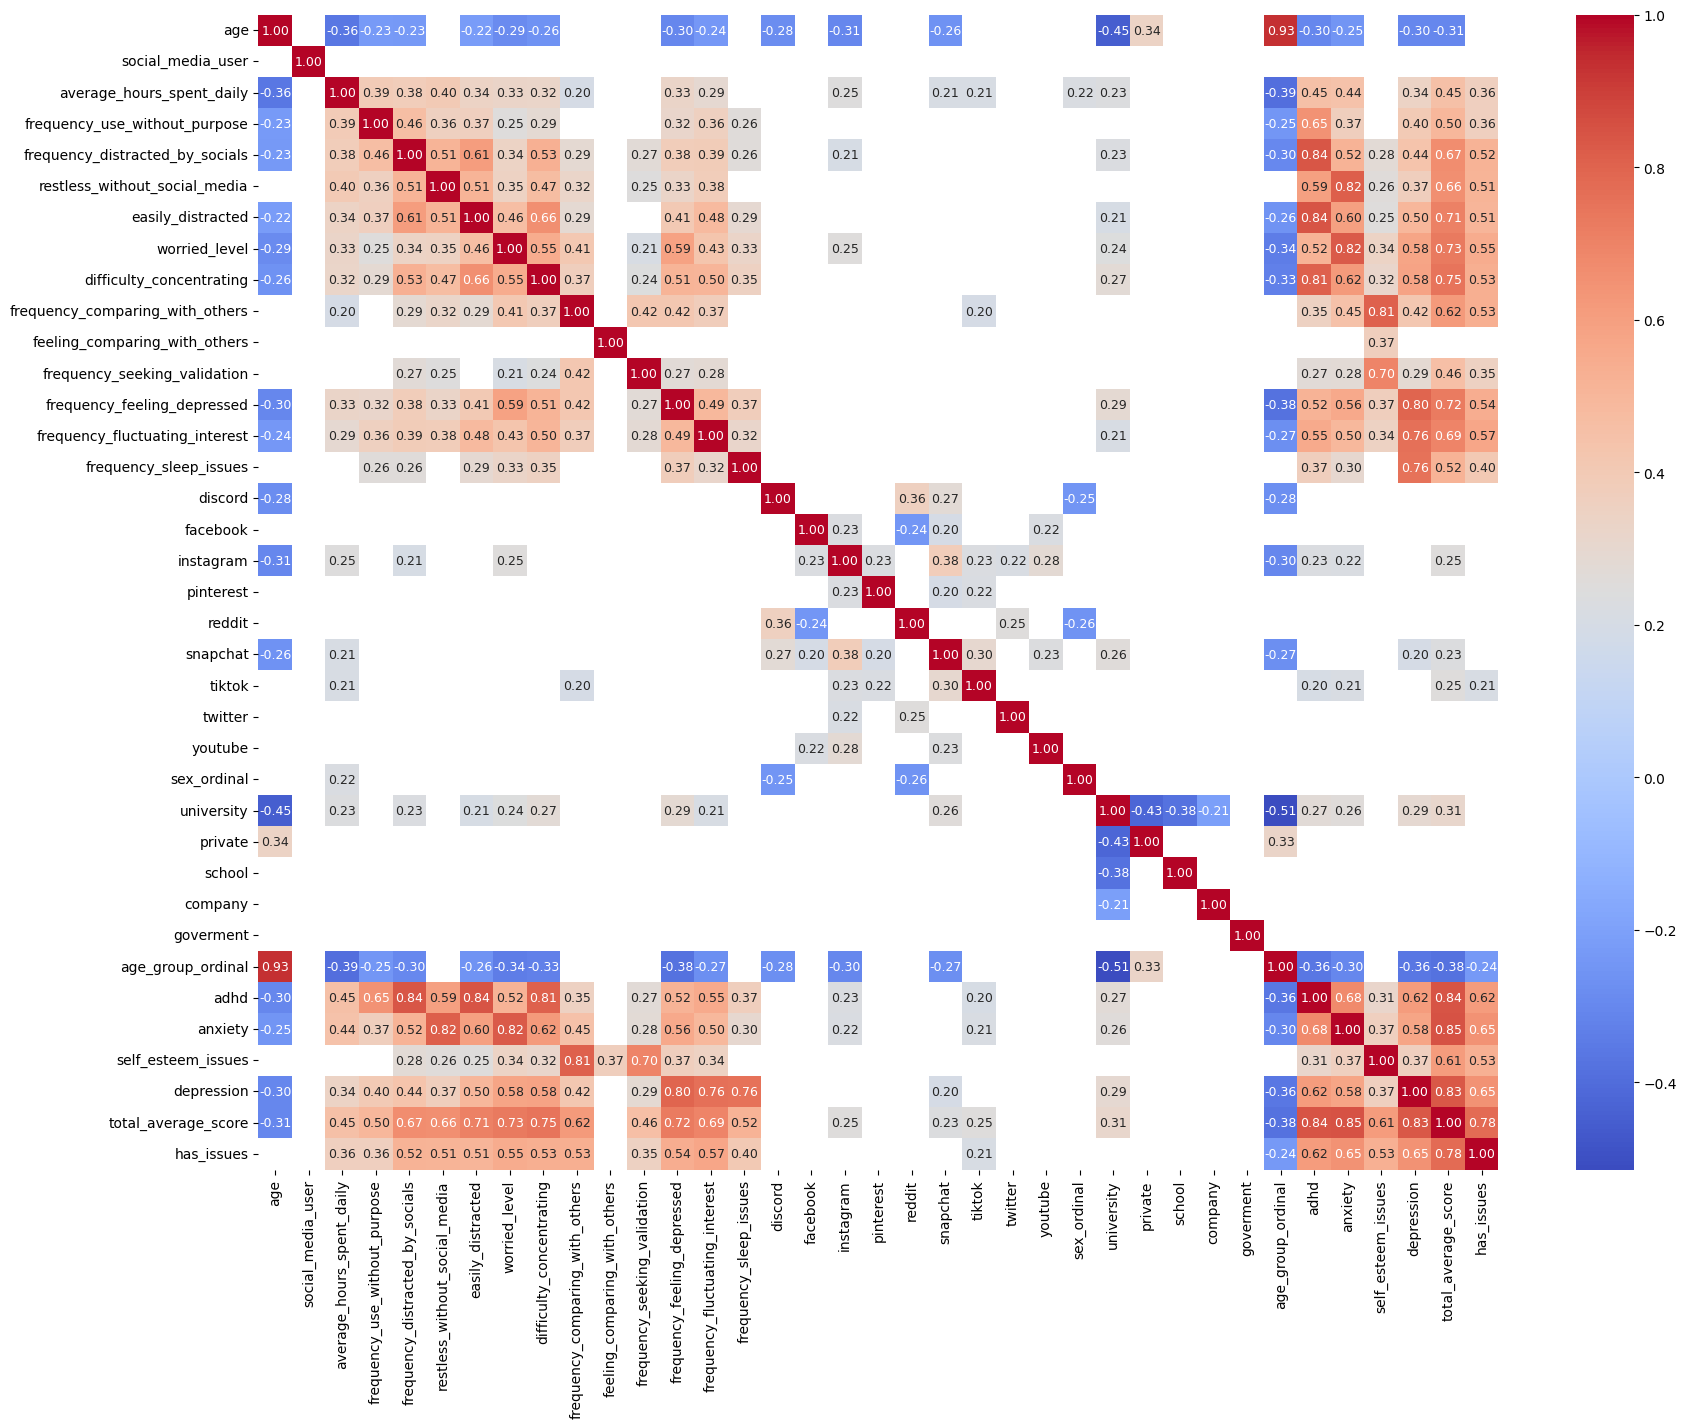

In [45]:
__MIN_SIGNIFICANCE_THRESHOLD__ = 0.2

filtered_correlation_matrix = correlation_matrix.copy()
filtered_correlation_matrix[(filtered_correlation_matrix >= -__MIN_SIGNIFICANCE_THRESHOLD__) 
                            & (filtered_correlation_matrix <= __MIN_SIGNIFICANCE_THRESHOLD__)] = np.nan

plt.figure(figsize=(20, 15))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size':9})
plt.show()

In [46]:
correlations = []

for column in filtered_correlation_matrix.columns:
    for index in filtered_correlation_matrix.index:
        correlation = filtered_correlation_matrix.loc[index, column]
        if pd.notna(correlation) and correlation != 1:
            if correlation < 0:
                correlation_type = "negative"
            else:
                correlation_type = "positive"
            
            if abs(correlation) < 0.4:
                correlation_strength = "weak"
            elif abs(correlation) < 0.7:
                correlation_strength = "moderate"
            else:
                correlation_strength = "strong"
            
            correlations.append((index, column, correlation_strength, correlation_type, correlation))

# Sort the correlations by index and correlation
correlations.sort(key=lambda x: (x[0], abs(x[4])))

def get_level(correlation_level: int) -> str:
    symbol = 'v' if correlation_level < 0 else '^'
    amount = abs(int(correlation_level * 10))
    return '|' + symbol * amount + '_' * (10 - amount) + '|'

socials_factors = [
    'social_media_user',
    'average_hours_spent_daily',
    'discord',
    'facebook',
    'instagram',
    'pinterest',
    'reddit',
    'snapchat',
    'tiktok',
    'twitter',
    'youtube',
]

mental_health_factors = [
    'frequency_use_without_purpose',
    'frequency_distracted', # by socials
    'restless_without_social_media',
    'frequency_comparing_with_others', # on social media
    'feeling_comparing_with_others', # on social media
    'frequency_seeking_validation', # on social media
    'easily_distracted',
    'worried_level',
    'difficulty_concentrating',
    'frequency_feeling_depressed',
    'frequency_fluctuating_interest',
    'frequency_sleep_issues',
    'adhd',
    'anxiety',
    'self_esteem_issues',
    'depression',
]

generalities_factors = [
    'sex_ordinal',
    'university',
    'private',
    'school',
    'company',
    'goverment',
    'age_group_ordinal',
]

factors_by_type = {
    col: 'socials' if col in socials_factors else 'mental_h' if col in mental_health_factors else 'general'
    for col in numerical_df.columns.to_list()
}

irrelevant_factors = [
    'age',
    'university'
]

obvious_correlating_factors = [
    tuple(couple.split(' --> '))
    for couple in 
    [
        'adhd --> difficulty_concentrating',
        'adhd --> age_group_ordinal',
        'easily_distracted --> difficulty_concentrating',
        'easily_distracted --> adhd',
    ]
]

# Generate the markdown text
markdown_text = "#### Correlation Results\n\n"
previous_index = None
hiding_mode: Literal['strike'] | Literal['hide'] = 'hide'
is_new_category = False
for index, column, correlation_strength, correlation_type, correlation in correlations:
    if index != previous_index:
        is_new_category = True

    not_relevant = True if (
        factors_by_type[index] == factors_by_type[column] or
        index in irrelevant_factors or 
        column in irrelevant_factors or
        (index, column) in obvious_correlating_factors or 
        (column, index) in obvious_correlating_factors
        ) else False
    
    if index not in socials_factors:
        not_relevant = True
    
    if not (column in mental_health_factors or column in generalities_factors):
        not_relevant = True

    if hiding_mode == 'hide' and not_relevant:
        continue

    if is_new_category:
        markdown_text += "\n\n" + "##### " + index + '\n\n'
        previous_index = index
        is_new_category = False
    strikethrough = '~~' if not_relevant else ''
    markdown_text += f" - {strikethrough}{get_level(correlation)} {'+' if correlation >= 0 else ''}{correlation:.2f} | {correlation_strength[:3].upper()} | {index} --> {'-' if correlation < 0 else ''} {column}{strikethrough}\n"

display(Markdown(markdown_text))


#### Correlation Results



##### average_hours_spent_daily

 - |^^________| +0.20 | WEA | average_hours_spent_daily -->  frequency_comparing_with_others
 - |^^________| +0.22 | WEA | average_hours_spent_daily -->  sex_ordinal
 - |^^________| +0.29 | WEA | average_hours_spent_daily -->  frequency_fluctuating_interest
 - |^^^_______| +0.32 | WEA | average_hours_spent_daily -->  difficulty_concentrating
 - |^^^_______| +0.33 | WEA | average_hours_spent_daily -->  worried_level
 - |^^^_______| +0.33 | WEA | average_hours_spent_daily -->  frequency_feeling_depressed
 - |^^^_______| +0.34 | WEA | average_hours_spent_daily -->  depression
 - |^^^_______| +0.34 | WEA | average_hours_spent_daily -->  easily_distracted
 - |vvv_______| -0.39 | WEA | average_hours_spent_daily --> - age_group_ordinal
 - |^^^_______| +0.39 | WEA | average_hours_spent_daily -->  frequency_use_without_purpose
 - |^^^^______| +0.40 | MOD | average_hours_spent_daily -->  restless_without_social_media
 - |^^^^______| +0.44 | MOD | average_hours_spent_daily -->  anxiety
 - |^^^^______| +0.45 | MOD | average_hours_spent_daily -->  adhd


##### discord

 - |vv________| -0.25 | WEA | discord --> - sex_ordinal
 - |vv________| -0.28 | WEA | discord --> - age_group_ordinal


##### instagram

 - |^^________| +0.22 | WEA | instagram -->  anxiety
 - |^^________| +0.23 | WEA | instagram -->  adhd
 - |^^________| +0.25 | WEA | instagram -->  worried_level
 - |vvv_______| -0.30 | WEA | instagram --> - age_group_ordinal


##### reddit

 - |vv________| -0.26 | WEA | reddit --> - sex_ordinal


##### snapchat

 - |^^________| +0.20 | WEA | snapchat -->  depression
 - |vv________| -0.27 | WEA | snapchat --> - age_group_ordinal


##### tiktok

 - |^^________| +0.20 | WEA | tiktok -->  frequency_comparing_with_others
 - |^^________| +0.20 | WEA | tiktok -->  adhd
 - |^^________| +0.21 | WEA | tiktok -->  anxiety


#### Correlation analysis result

##### Platforms analysis
Social networks like Discord and Reddit have a weak negative correlation with sex, meaning the males are more likely than females to use those platforms, while other networks in this analysis seem not to have any clear favorite sex. Many nevertheless have a weak negative correlation with age group, meaning that they are more likely used by young people than older ones. While TikTok is often considered a youngsters' social network, is one of the few (together with Reddit) that has not clear correlation with age groups. Snapchat has a weak correlation with depression. TikTok instead has a weak correlation with symptoms of ADHD and anxiety. To greater degree, Instagram shares a correlation for the same symptom, possibly due to their user-tailored fast-paced content fruition, but also correlates with feeling worried and frequently distracted.

##### Time analysis
Time spent on social networks has a weak association with sex, meaning that women are more likely to spend their time on social platforms, and a negative association with age group, meaning that young people use them more than old ones. Spending many hours on social media has a moderate correlation with symptoms connected with anxiety and Attention-Deficit / Hyperactivity Disorder (ADHD). People who spend more hours on socials more frequently reported feeling restless when they don't use them (moderate correlation). To a lesser degree (weak correlation), spending long time on social networks is also correlated with feeling anxious, depressed, easily distracted, and excessively worried. Still as a weak correlation, reports of feeling distracted, difficulty concentrating and keeping the same interest, and often comparing to others on social media.

##### Summary
Our current analysis can only highlight a correlation between social networks and mental health, but cannot establish any causation between them. A mind issue can be caused by social media, as well as social media cause that issue, or as well that some underlying factor is leading to both. Nevertheless, we can notice different associations based on the platforms one used, with TikTok and Instagram having an higher audience with ADHD and anxiety symptoms, while Snapchat has more people with signs of depression. However, the strongest correlations are effectively with the time one spends on social networks, with ADHD, anxiety and feeling restless without being online being the clearest symptoms. Education and occupation did not have any significant effect in our dataset. Age group has a considerable effect in our dataset, and with many social networks being more used by young people. However, data on age has to be taken with caution as our data is extremely skewed towards teens and young adults. Some social networks also had a more male-oriented audience than others.

### t-test analysis

In [47]:
import numpy as np
from scipy import stats

n = len(correlation_matrix)

p_matrix = correlation_matrix.copy()

for i in correlation_matrix.columns:
    for j in correlation_matrix.columns:
        r = correlation_matrix.loc[i, j]
        if i == j:
            p = np.nan
        else:
            t = r * np.sqrt((n-2) / (1 - r**2))
            p = stats.t.sf(np.abs(t), n-2)*2  # two-sided pvalue
        p_matrix.loc[i, j] = p

print(p_matrix)

                                          age  social_media_user  \
age                                       NaN           0.782781   
social_media_user                7.827806e-01                NaN   
average_hours_spent_daily        2.780056e-02           0.510055   
frequency_use_without_purpose    1.802267e-01           0.603568   
frequency_distracted_by_socials  1.669569e-01           0.413508   
restless_without_social_media    4.583712e-01           0.555128   
easily_distracted                1.817152e-01           0.503539   
worried_level                    8.310167e-02           0.490606   
difficulty_concentrating         1.136106e-01           0.507147   
frequency_comparing_with_others  5.859160e-01           0.543401   
feeling_comparing_with_others    9.157050e-01           0.961737   
frequency_seeking_validation     8.187337e-01           0.586100   
frequency_feeling_depressed      6.767759e-02           0.493761   
frequency_fluctuating_interest   1.499527e-01   

## Logistic Regression

In [48]:
numerical_df.columns

Index(['age', 'social_media_user', 'average_hours_spent_daily',
       'frequency_use_without_purpose', 'frequency_distracted_by_socials',
       'restless_without_social_media', 'easily_distracted', 'worried_level',
       'difficulty_concentrating', 'frequency_comparing_with_others',
       'feeling_comparing_with_others', 'frequency_seeking_validation',
       'frequency_feeling_depressed', 'frequency_fluctuating_interest',
       'frequency_sleep_issues', 'discord', 'facebook', 'instagram',
       'pinterest', 'reddit', 'snapchat', 'tiktok', 'twitter', 'youtube',
       'sex_ordinal', 'university', 'private', 'school', 'company',
       'goverment', 'age_group_ordinal', 'adhd', 'anxiety',
       'self_esteem_issues', 'depression', 'total_average_score',
       'has_issues'],
      dtype='object')

In [49]:
selected_columns = ['sex_ordinal', 'age_group_ordinal', 'average_hours_spent_daily', 'discord', 'facebook', 'instagram', 'pinterest', 'reddit', 'snapchat', 'tiktok', 'twitter', 'youtube']
X = numerical_df[selected_columns]
y = numerical_df["has_issues"]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model on the training set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = metrics.classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.7525773195876289

Confusion Matrix:
[[56 10]
 [14 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        66
           1       0.63      0.55      0.59        31

    accuracy                           0.75        97
   macro avg       0.71      0.70      0.70        97
weighted avg       0.75      0.75      0.75        97



In [50]:
tn, fp, fn, tp = conf_matrix.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)


True Negatives: 56
False Positives: 10
False Negatives: 14
True Positives: 17


In [51]:
classification_report_values = metrics.classification_report(y_test, y_pred, output_dict=True)

class_metrics = {}

for key, value in classification_report_values.items():
    if key != 'accuracy':
        print(f"{key.capitalize()}:")
        class_metrics[key] = {}
        for metric, score in value.items():
            class_metrics[key][metric] = score
            print(f"{metric}: {score}")
        print()

0:
precision: 0.8
recall: 0.8484848484848485
f1-score: 0.823529411764706
support: 66.0

1:
precision: 0.6296296296296297
recall: 0.5483870967741935
f1-score: 0.5862068965517241
support: 31.0

Macro avg:
precision: 0.7148148148148148
recall: 0.6984359726295211
f1-score: 0.704868154158215
support: 97.0

Weighted avg:
precision: 0.7455517373043146
recall: 0.7525773195876289
f1-score: 0.7476840718512787
support: 97.0



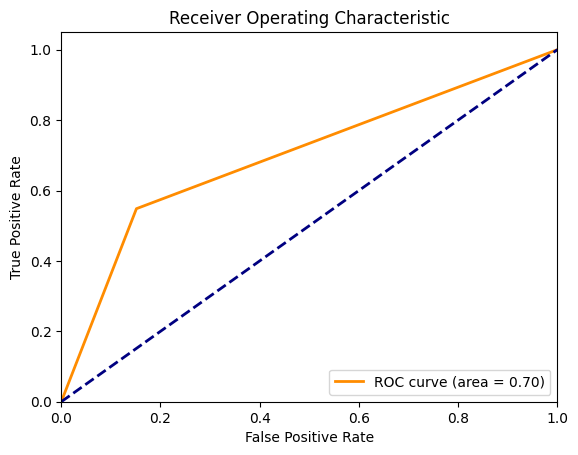

In [52]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
rounded_accuracy = round(accuracy*100, 2)
text_regression_result = f"""
Logistic Regression Result

Accuracy:
The model correctly predicted the class (either 0 or 1) about {rounded_accuracy}% of the time.

Confusion Matrix:
True Positives (TP): {tp} - The number of instances correctly predicted as class 1.
False Positives (FP): {fp} - The number of instances incorrectly predicted as class 1.
True Negatives (TN): {tn} - The number of instances correctly predicted as class 0.
False Negatives (FN): {fn} - The number of instances incorrectly predicted as class 0.
The confusion matrix shows the model's performance in terms of correctly and incorrectly predicted instances for each class.

Classification Report:

Precision:
Precision for class 0: Out of all instances predicted as class 0, {round(class_metrics['0']['precision'], 2)}% were actually class 0.
Precision for class 1: Out of all instances predicted as class 1, {round(class_metrics['1']['precision'], 2)}% were actually class 1.

Recall (Sensitivity):
Recall for class 0: Out of all actual class 0 instances, the model correctly predicted {round(class_metrics['0']['recall'], 2)}%.
Recall for class 1: Out of all actual class 1 instances, the model correctly predicted {round(class_metrics['1']['recall'], 2)}%.

F1-score is the harmonic mean of precision and recall, providing a balanced measure.
Weighted F1-score ({round(class_metrics['weighted avg']['f1-score'], 2)}): A balance between precision and recall for both classes, considering the class imbalance.

Support:
The number of actual occurrences of each class in the specified dataset.

Conclusion:
In conclusion, the logistic regression model exhibits an overall accuracy of {rounded_accuracy}%, 
demonstrating its ability to make correct predictions across both classes. The model's 
performance is characterized by a commendable precision for class 0, indicating reliable 
identification of instances belonging to this class. However, there is room for enhancement, 
particularly in improving recall for class 1. The trade-off between precision and recall, 
as reflected in the F1-score, suggests a need for fine-tuning to strike a better balance. 
Further optimization of hyperparameters and potentially exploring more advanced models may 
contribute to achieving a more robust and well-rounded predictive model. Understanding 
the specific requirements and implications of false positives and false negatives will be crucial 
in refining the model to align with the desired outcome.
"""

print(text_regression_result)


Logistic Regression Result

Accuracy:
The model correctly predicted the class (either 0 or 1) about 75.26% of the time.

Confusion Matrix:
True Positives (TP): 17 - The number of instances correctly predicted as class 1.
False Positives (FP): 10 - The number of instances incorrectly predicted as class 1.
True Negatives (TN): 56 - The number of instances correctly predicted as class 0.
False Negatives (FN): 14 - The number of instances incorrectly predicted as class 0.
The confusion matrix shows the model's performance in terms of correctly and incorrectly predicted instances for each class.

Classification Report:

Precision:
Precision for class 0: Out of all instances predicted as class 0, 0.8% were actually class 0.
Precision for class 1: Out of all instances predicted as class 1, 0.63% were actually class 1.

Recall (Sensitivity):
Recall for class 0: Out of all actual class 0 instances, the model correctly predicted 0.85%.
Recall for class 1: Out of all actual class 1 instances, th

In [54]:
print("Predicted Values using Logistic Regression: ", y_pred)
print()

print(f"Accuracy score using the Logistic regression model: {rounded_accuracy}%")


Predicted Values using Logistic Regression:  [0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0]

Accuracy score using the Logistic regression model: 75.26%
